## Introduction

For my capstone project, I would like to demonstrate my abilities working with an imbalanced dataset. This is a domain in data science that has been a subject of research for some time and it crosses over various industries from detecting fraudulent transactions in finance, failure/defect detection in manufacturing to diagnosing rare diseases in healthcare. As of now, there is no clear overall alogrithmitic solution as it highly depends on the data and business problem you are trying to solve. 

The dataset I will be sharing belongs to an indian banking company and it is a credit scoring binary classification problem. It contains raw customer financial information from three different datasets and it was split onto 70% training, 30% testing dataset. This requires me to understand the data and perform data integration from various sources together via feature extraction. Afterwhich, the training dataset was balanced by sampling the minority class and fed onto the machine learning classifier before finally testing its ability to accurately predict which customer will default.  


## Credit Scoring Business Problem

An indian credit information company wants to predict the application score for its current customers and determine their credit worthiness to reduce credit default risk.

The target variable denoted as *Bad_label*
- 0 means customer has good credit history
- 1 means customer has 30 days past due (DPD) bucket

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# load the data (Apr - Dec 2015)
# customer's historical accounts data and payment behavior history
raw_acc_70 = pd.read_csv('./raw_account_70_new.csv') # (186329, 21)

# customer's historical enquiry data such as enquiry amount / purpose
raw_enq_70 = pd.read_csv('./raw_enquiry_70_new.csv') # (413188, 6)

# current customer applications with demographic data
raw_data_70 = pd.read_csv('./raw_data_70_new.csv') # (23896, 83)

/Users/WenLin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/WenLin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,20,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_enq_70.head()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2.0,3500000.0
1,18-Apr-15,1,21-Apr-15,5-Mar-14,5.0,500000.0
2,18-Apr-15,1,21-Apr-15,5-Mar-14,0.0,50000.0
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10.0,50000.0
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10.0,1000.0


In [4]:
raw_acc_70.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,13500,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data_70.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,3-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,1-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0
4,6-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,3-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0


**Understanding the data and performing data wrangling**

A credit card customer maintains his/her application score by maintaining a good credit history, which is essential for loan approvals by lenders. According to [CIBIL](https://www.cibil.com/frequent-queries), customers better their score and reduce credit default risk by practicing the following financial habits:

1. Paying their dues on time: Late payments are viewed negatively by lenders.
2. Keep their balances low by not using too much credit and controling their utilization.
3. Maintain a healthy credit mix of secured (such as home loan, auto loan) and unsecured loans (such as personal loan, credit cards). Too many unsecured loans may be viewed negatively.
4. Apply for new credit in moderation and not excessively.
5. Reviewing their credit history frequently throughout the year

From inspection, the datasets have one common feature which is 'customer_no' and the new data model for training needs to contain features from all 3 datasets. The following 12 features are generated below as suggested:

*Under enquiry dataset*
1. Ratio of secured loan over total enquiry purposes made 
2. Number of enquiries made in the past 90 days 
3. Number of enquiries made in the past 365 days 
4. Most frequent enquiry purpose 
5. Average difference between enquiry dt_opened and enquiry date 

*Under account dataset*
6. Mean of payment history behavior in 0-29 days past due (DPD bucket)
7. Total duration between last payment date before 30 DPD appeared for each account
8. Smallest number of months passed before first 30 DPD appeared
9. Ratio of total current balance amount/ total credit limit 
9. Utilisation trend = (Ratio of total current balance amount/ total credit limit ) / (mean current balance amount / [mean credit limit + mean cash limit])
10. Mean duration between last payment date and account open date for all acounts
11. Mean length of payment history variable

In [6]:
# Finding a way to merge all 3 dataframes together 
# Training set
df_acc = raw_acc_70.copy()
df_enq = raw_enq_70.copy()
df_data = raw_data_70.copy()

In [7]:
def pay_clean(data):
    output = []
    data = data[3:-3] # to get rid of """ """

    for i in range(0,len(data)+3,3): # count +3
        output.append(data[i:i+3])
    return output

def count_dpd(data):
    for i in sorted(data,reverse=True):
        if i in ['XXX','STD','SMA','SUB','DBT','LSS']:
            pass
        else:
            break
    return i

## Feature Extraction/Engineering - Accounts Data

- **Payment history behavior in 0-29 DPD Bucket**

In [8]:
# Training set
a1 = df_acc[['customer_no','paymenthistory1']]
a1['paymenthistory1'] = a1['paymenthistory1'].apply(pay_clean).apply(list)
a1['dpd'] = a1['paymenthistory1'].apply(count_dpd)

# mean counts of payment history behavior within 000-029 dpd bucket
a1['dpd_29']=a1['dpd'].apply(lambda x: 1 if x <= '029' and x >= '000' else 0)
a1 = a1.groupby('customer_no').mean()
a1.reset_index(drop=True, inplace=True)

In [9]:
a1.head()

,dpd_29
0,0.444444
1,1.000000
2,1.000000
3,0.705882
4,0.857143


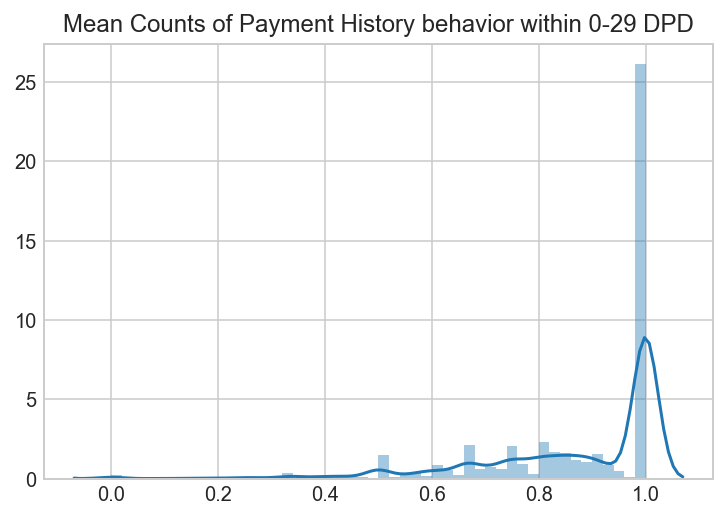

In [10]:
sns.distplot(a1).set_title('Mean Counts of Payment History behavior within 0-29 DPD');

As can be seen from this distribution, clearly majority of the customers do make their payments on time before it reaches 30 days pass due. 

- **Total duration between last payment date and account opened date**

In [11]:
a2 = df_acc[['customer_no','last_paymt_dt','opened_dt']]
a2['opened_dt'] = pd.to_datetime(a2['opened_dt'])
a2['last_paymt_dt'] = pd.to_datetime(a2['last_paymt_dt'])

a2['total_lastpy_opendt'] = a2['last_paymt_dt'] - a2['opened_dt']
a2['total_lastpy_opendt'] = a2['total_lastpy_opendt'].astype('timedelta64[D]')

In [12]:
a2 = a2.groupby('customer_no').sum()
a2 = a2['total_lastpy_opendt']

a2.reset_index(drop=True, inplace=True)
a2.head()

0    14960.0
1     4070.0
2     2454.0
3    38600.0
4     1357.0
Name: total_lastpy_opendt, dtype: float64

In [13]:
# replace missing values
a2 = a2.fillna(a2.median())

In [14]:
print 'median',a2.median()
a2.describe()

median 2947.0


count    23896.000000
mean      5426.052143
std       7298.918650
min          0.000000
25%       1274.000000
50%       2947.000000
75%       6392.250000
max      96440.000000
Name: total_lastpy_opendt, dtype: float64

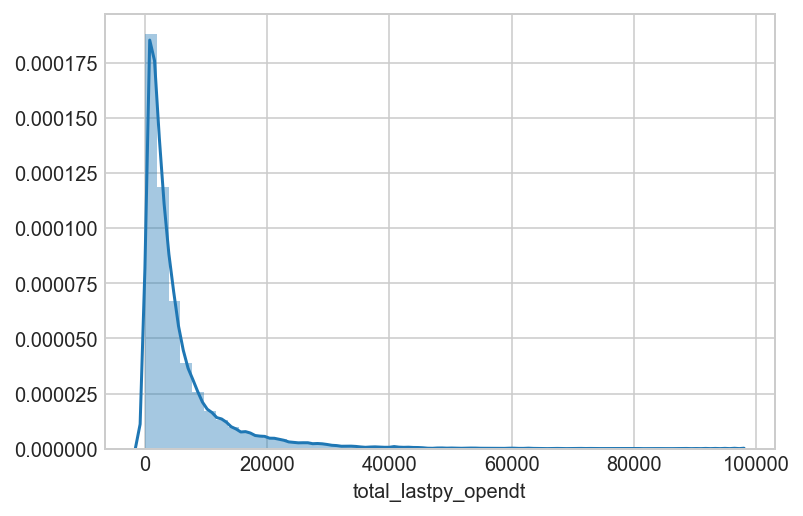

In [15]:
sns.distplot(a2);

- **Smallest number of months passed before first 30 DPD appeared**

In [16]:
def minmonth(data):
    output = 0
    for i in data:
        if (i < '030') or i in ['XXX','STD','SMA','SUB','DBT','LSS']:
            output+=1 # each [000] represents a month so in paymenthistory1
        else:
            return output
    return 0

In [17]:
a3 = df_acc[['customer_no','paymenthistory1']]
a3['paymenthistory1'] = a3['paymenthistory1'].apply(pay_clean).apply(list)

a3['min_months_last_30_plus'] = a3['paymenthistory1'].apply(minmonth)
a3 = a3.groupby('customer_no').sum()
a3.reset_index(drop=True, inplace=True)
a3.head()

,min_months_last_30_plus
0,0
1,0
2,0
3,3
4,0


- **Ratio of total current bal amt / total credit limit**

In [18]:
a4 = df_acc[['customer_no','cur_balance_amt','creditlimit']]
a4 = a4.groupby('customer_no')['cur_balance_amt','creditlimit'].apply(sum).reset_index()
a4['creditlimit'] = a4['creditlimit'].replace(0, np.inf) 
a4['total cur_bal_amt/total credit limit'] = a4['cur_balance_amt'] / a4['creditlimit']
a4 = a4[['customer_no','total cur_bal_amt/total credit limit']]

In [19]:
# for merging columns
a4m = a4['total cur_bal_amt/total credit limit']

- **Utilisation trend**

In [20]:
# determine ultisation trend
a5 = df_acc[['customer_no','creditlimit','cashlimit','cur_balance_amt']]
a5 = a5.fillna(0)

a5 = a5.groupby('customer_no')['cur_balance_amt','creditlimit','cashlimit'].agg(lambda x: list(x))
a5 = a5.applymap(np.mean).reset_index()
a5 = a5.replace(0, np.inf)

a5['mean cur_bal_amt/(mean_credit limit+ mean_cashlimit)'] = a5['cur_balance_amt'] / (a5['creditlimit']/a5['cashlimit'])
a5 = a5[['customer_no','mean cur_bal_amt/(mean_credit limit+ mean_cashlimit)']]
a5 = pd.merge(a5,a4, how='inner', on='customer_no')

a5 = a5.fillna(0)
a5['mean cur_bal_amt/(mean_credit limit+ mean_cashlimit)'] = a5['mean cur_bal_amt/(mean_credit limit+ mean_cashlimit)'].replace(0, np.inf)

a5['utilisation_trend'] = a5['total cur_bal_amt/total credit limit'] / a5['mean cur_bal_amt/(mean_credit limit+ mean_cashlimit)']

a5 = a5[['customer_no','utilisation_trend']]

In [21]:
a5.utilisation_trend.describe()

count    23896.000000
mean         0.029292
std          0.665772
min          0.000000
25%          0.000054
50%          0.000173
75%          0.000437
max         31.000000
Name: utilisation_trend, dtype: float64

In [22]:
# for merging
a5m = a5['utilisation_trend']

Majority of the customers maintain a low utilisation rate at around 3% , which means that they maintain a good credit score

- ** Mean difference between last payment date and account open date **

In [23]:
a6 = df_acc[['customer_no','last_paymt_dt','opened_dt']]

a6['opened_dt'] = pd.to_datetime(a6['opened_dt'])
a6['last_paymt_dt'] = pd.to_datetime(a6['last_paymt_dt'])

a6['mean_lastpy_opendt'] = a6['last_paymt_dt'] - a6['opened_dt']
a6['mean_lastpy_opendt'] = a6['mean_lastpy_opendt'].astype('timedelta64[D]')

In [24]:
a6 = a6.groupby('customer_no').mean()
a6 = a6['mean_lastpy_opendt']
a6 = a6.fillna(a6.median())

a6.reset_index(drop=True, inplace=True)
a6.head()

0    1496.000000
1    2035.000000
2    2454.000000
3    2757.142857
4     678.500000
Name: mean_lastpy_opendt, dtype: float64

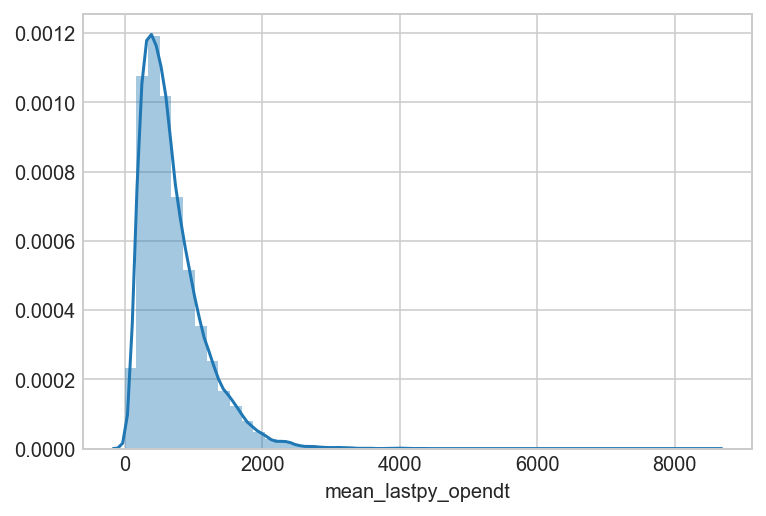

In [25]:
sns.distplot(a6)

- **Payment history mean length**

In [26]:
a7 = df_acc[['customer_no','paymenthistory1']]

a7['paymenthistory1'] = a7['paymenthistory1'].apply(pay_clean)
a7['mean_paymt_his'] = a7['paymenthistory1'].apply(len) # each [000] in paymenthistory is 1 month
a7 = a7.groupby('customer_no').mean()

a7.reset_index(drop=True, inplace=True)
a7.head()

,mean_paymt_his
0,10.388889
1,19.000000
2,19.000000
3,13.588235
4,13.714286


In [27]:
print a7.median()
a7.describe()

mean_paymt_his    12.857143
dtype: float64


,mean_paymt_his
count,23896.000000
mean,12.694248
std,3.360148
min,2.000000
25%,10.500000
50%,12.857143
75%,15.000000
max,19.000000


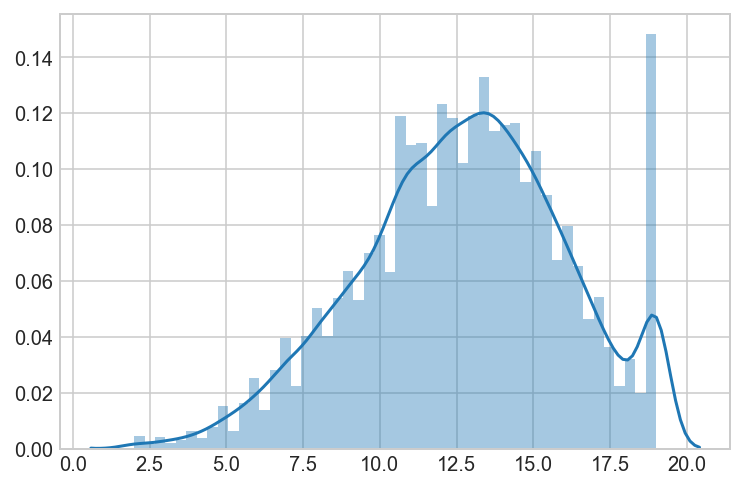

In [28]:
sns.distplot(a7)

Payment history distribution appears to be negatively skewed, there is an outlier near the end of the tail

In [29]:
a7.mean_paymt_his.value_counts().head()

19.0    1134
11.0     545
12.0     519
13.0     517
14.0     515
Name: mean_paymt_his, dtype: int64

In [30]:
# replace 19 with median value
median = a7.loc[a7['mean_paymt_his'] < 19, 'mean_paymt_his'].median()
a7['mean_paymt_his'] = a7["mean_paymt_his"].mask(a7["mean_paymt_his"] == 19, median)

In [31]:
print a7.median()
a7.describe()

mean_paymt_his    12.625
dtype: float64


,mean_paymt_his
count,23896.000000
mean,12.391718
std,3.051599
min,2.000000
25%,10.500000
50%,12.625000
75%,14.538462
max,18.928571


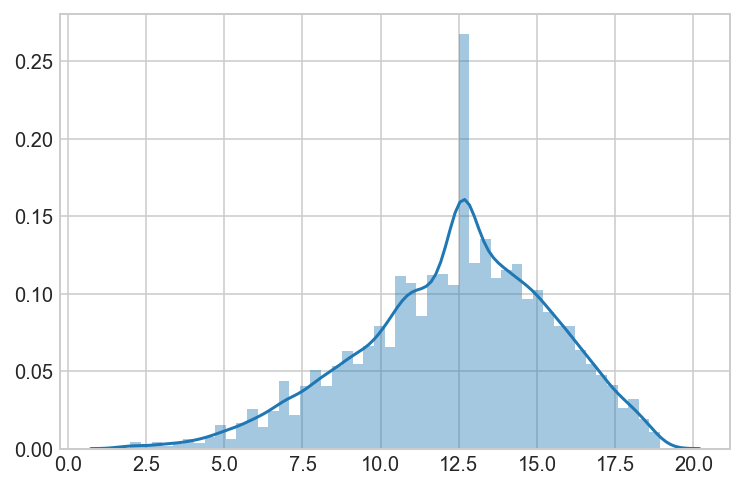

In [32]:
sns.distplot(a7)

Distribution is more normal now.

## Feature Extraction/Engineering - Enquiry Data

In [33]:
df_enq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
dt_opened      413188 non-null object
customer_no    413188 non-null int64
upload_dt      413078 non-null object
enquiry_dt     413078 non-null object
enq_purpose    413078 non-null float64
enq_amt        413078 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


- **Enquiry count in pass 365 days and 90 days**

In [34]:
def days_pass_enq_dt(data):
    data['enquiry_dt'] = pd.to_datetime(data['enquiry_dt'])
    data['dt_opened'] = pd.to_datetime(data['dt_opened'])
    
    # No. of days pass enquiry date
    data['days_pass_enq_dt'] = data['dt_opened'] - data['enquiry_dt']
    data['days_pass_enq_dt'] = data['days_pass_enq_dt'].astype('timedelta64[D]')
    return data

df_enq_days = days_pass_enq_dt(df_enq)

In [35]:
# Retreive number of enquiries made in pass 365 days and 90 days
b1 = df_enq_days[df_enq_days.days_pass_enq_dt <= 365].groupby('customer_no').size()
b2 = df_enq_days[df_enq_days.days_pass_enq_dt <= 90].groupby('customer_no').size() 

- **Most frequent enquiry purpose for each customer**

In [36]:
# Retrieve most frequent enquiry purpose for each customer
def max_freq_enq(data):
    data = pd.DataFrame(data.groupby('customer_no').enq_purpose.apply(lambda x: stats.mode(x)[0]))
    data['enq_purpose'] = data['enq_purpose'].str[0] 
    data = data.rename(index=str, columns={"enq_purpose": "max_freq_enq"})
    data.reset_index(drop=True, inplace=True)
    return data

b3 = max_freq_enq(df_enq) 

- **Ratio of secured loan type over total enquiry purpose made**

In [37]:
def sec_loan(data):
    # Retrieve enquiry dataframe where enquiry purpose is a secured loan
    sec = data.enq_purpose
    m1 = (sec == 1 )|(sec == 2 )|(sec == 3 )|(sec == 4 )|(sec == 7 )|(sec == 11)|(sec == 13)|(sec == 14)|(sec == 15)|(sec == 17)
    m2 = (sec == 32)|(sec == 33)|(sec == 34)|(sec == 51)|(sec == 52)|(sec == 53)|(sec == 54)|(sec == 55)|(sec == 56)|(sec == 57)
    m3 = (sec == 58)|(sec == 59)
    mask = m1|m2|m3
    return data[mask]

df_enq_sec = sec_loan(df_enq)

In [38]:
# Find ratio of secured loan enquiry purpose/ total enquiry purpose made
total_enq = df_enq.groupby('customer_no').size()
sec_enq = df_enq_sec.groupby('customer_no').size()

b4 = (sec_enq/total_enq).T

- **Average difference between enquiry dt_opened and enquiry_dt**

In [39]:
# Determine average difference between enquiry dt_opened and enquiry_dt
b5 = df_enq_days.groupby('customer_no').mean()
b5 = b5.drop(['enq_purpose','enq_amt'], axis= 1)
b5.reset_index(drop=True, inplace=True)

## Correlation Visualisation

** Merged features from both enquiry and accounts dataset together**

In [40]:
# Import customer_no
a0 = df_data.customer_no
d0 = df_data.Bad_label
# Generate feature engineered data model for modeling
merge = pd.concat([a0,a1,a2,a3,a4m,a5m,a6,a7,b1,b2,b3,b4,b5,d0],axis=1)
merge[[0,1,2]] = merge[[0,1,2]].shift(-1) 
merge = merge.rename(index=str, columns={0:"no_enq_365", 1:"no_enq_90", 2:"ratio_sec/tot_enq"})
# Remember to drop last row
merge = merge.drop(merge.index[23896])

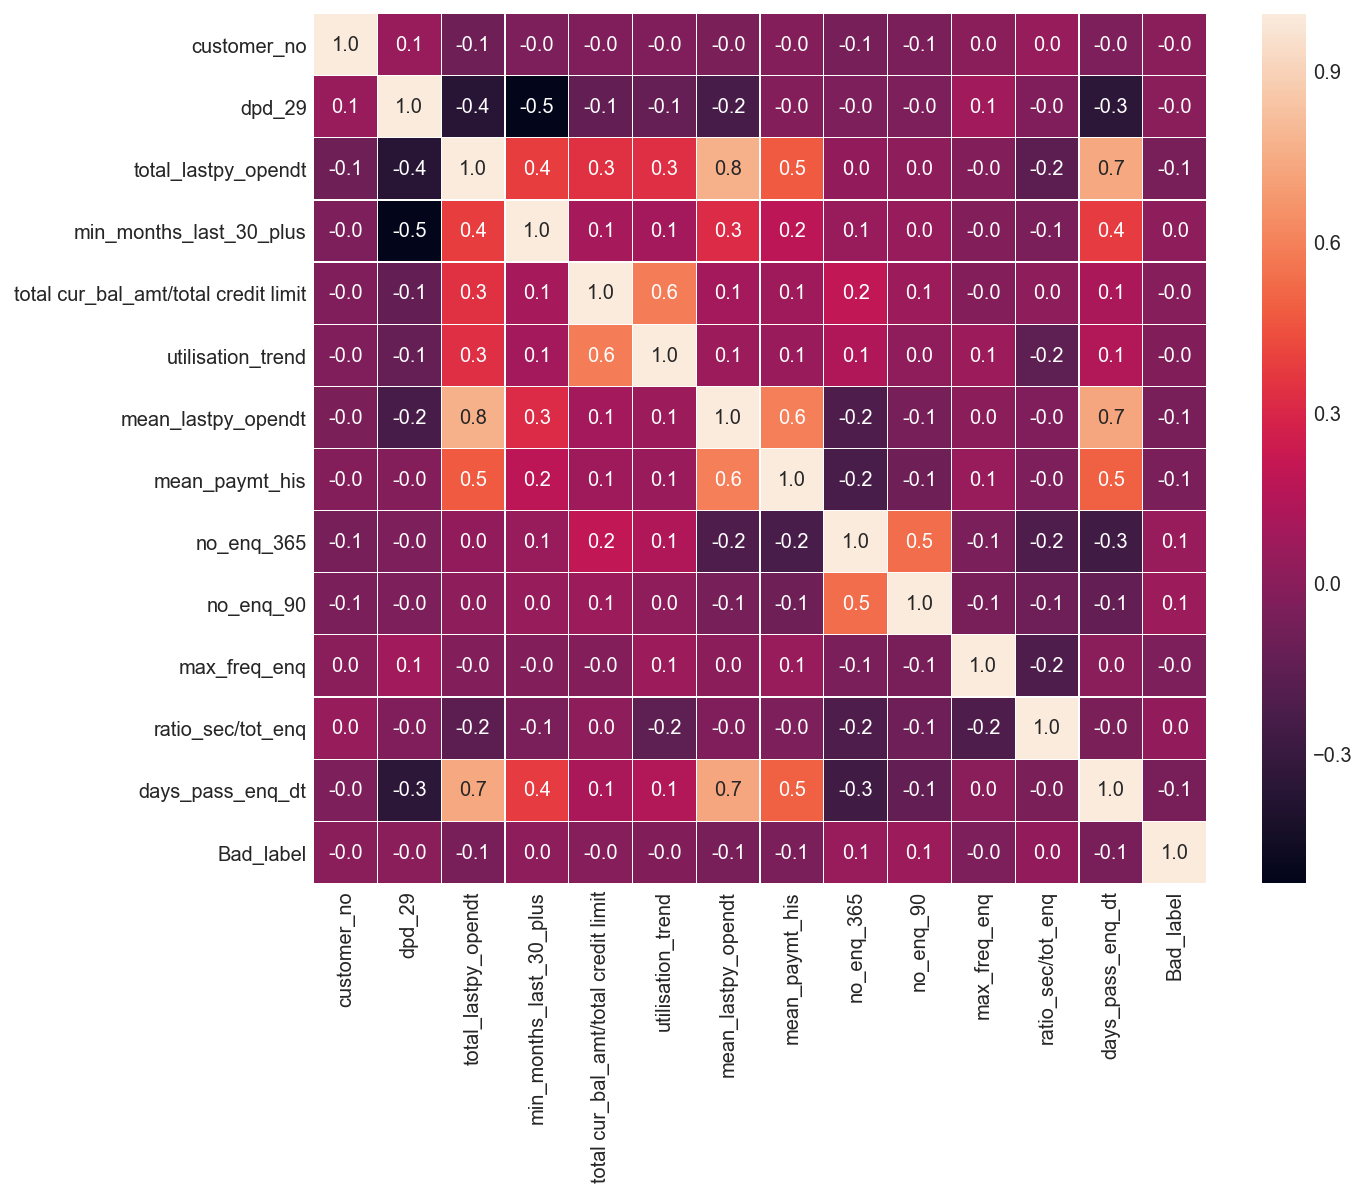

In [41]:
col = merge[list(merge.columns)]
to_heatmap = col.corr(method='spearman', min_periods=1)

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(to_heatmap, annot=True, fmt=".1f", linewidths=.1)

From the heatmap, it can be seen that there is zero to negative correlation with Bad_label.

## Feature Extraction/Engineering - Demographic Data 

In [42]:
df_data = raw_data_70.copy()

In [43]:
df_data.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,3-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,1-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0
4,6-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,3-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0


**Exploratory Data Analysis**

In [44]:
df_data.isnull().sum().sort_values(ascending=False)

feature_61     23887
feature_74     23879
feature_18     23878
feature_10     23845
feature_49     23792
feature_17     22869
feature_8      22635
feature_9      22635
feature_57     21503
feature_73     20951
feature_48     18399
feature_45     13713
feature_13     13004
feature_53     11610
feature_51     11422
feature_14      7733
feature_38      5682
feature_37      5682
feature_36      5682
feature_27      3637
feature_3       2836
feature_2       2836
feature_24       640
feature_46        94
feature_16        27
feature_15        23
feature_30        15
feature_29        15
feature_31        15
feature_32        15
               ...  
feature_70        15
feature_69        15
feature_68        15
feature_67        15
feature_66        15
feature_65        15
feature_64        15
feature_63        15
feature_62        15
feature_60        15
feature_59        15
feature_58        15
feature_56        15
feature_55        15
feature_54        15
feature_52        15
feature_50   

In [45]:
# Remove features with >50% null values
drop_feats_null = ['feature_61','feature_74','feature_18','feature_10','feature_49','feature_17','feature_8','feature_9',
                   'feature_57','feature_73','feature_48','feature_45','feature_13','feature_53','feature_51']

df_data = df_data.drop(drop_feats_null, axis=1)

In [46]:
def nearZeroVariance(X, freqCut = 95 / 5, uniqueCut = 10):
    '''
    Determine predictors with near zero or zero variance.
    Inputs:
    X: pandas data frame
    freqCut: the cutoff for the ratio of the most common value to the second most common value
    uniqueCut: the cutoff for the percentage of distinct values out of the number of total samples
    Returns a tuple containing a list of column names: (zeroVar, nzVar)
    '''
    
    colNames = X.columns.values.tolist()
    freqRatio = dict()
    uniquePct = dict()

    for names in colNames:
        counts = (
            (X[names])
            .value_counts()
            .sort_values(ascending = False)
            .values
            )

        if len(counts) == 1:
            freqRatio[names] = -1
            uniquePct[names] = (len(counts) / len(X[names])) * 100
            continue

        freqRatio[names] = counts[0] / counts[1]
        uniquePct[names] = (len(counts) / len(X[names])) * 100

    zeroVar = list()
    nzVar = list()
    for k in uniquePct.keys():
        if freqRatio[k] == -1:
            zeroVar.append(k)

        if uniquePct[k] < uniqueCut and freqRatio[k] > freqCut:
            nzVar.append(k)
    print "features with zero variance:",zeroVar
    print "features with nearZero variance",nzVar
    print "removing features with zero/nearZero variance from dataset..."

    return(X.drop(zeroVar+nzVar, axis=1))

In [47]:
# Remove features with near zero, zero variance
df_data = nearZeroVariance(df_data)

features with zero variance: ['feature_6', 'feature_5', 'feature_54']
features with nearZero variance ['feature_31', 'feature_75', 'feature_76', 'feature_46', 'feature_60', 'feature_62', 'feature_79', 'feature_78', 'feature_42', 'feature_58', 'Bad_label', 'feature_55']
removing features with zero/nearZero variance from dataset...


In [48]:
# Added back the target feature
df_data.Bad_label = raw_data_70.Bad_label

# Customers who defaulted
df_data_def = df_data[df_data.Bad_label == 1]

Further exploratory data analysis on relevant categorical columns

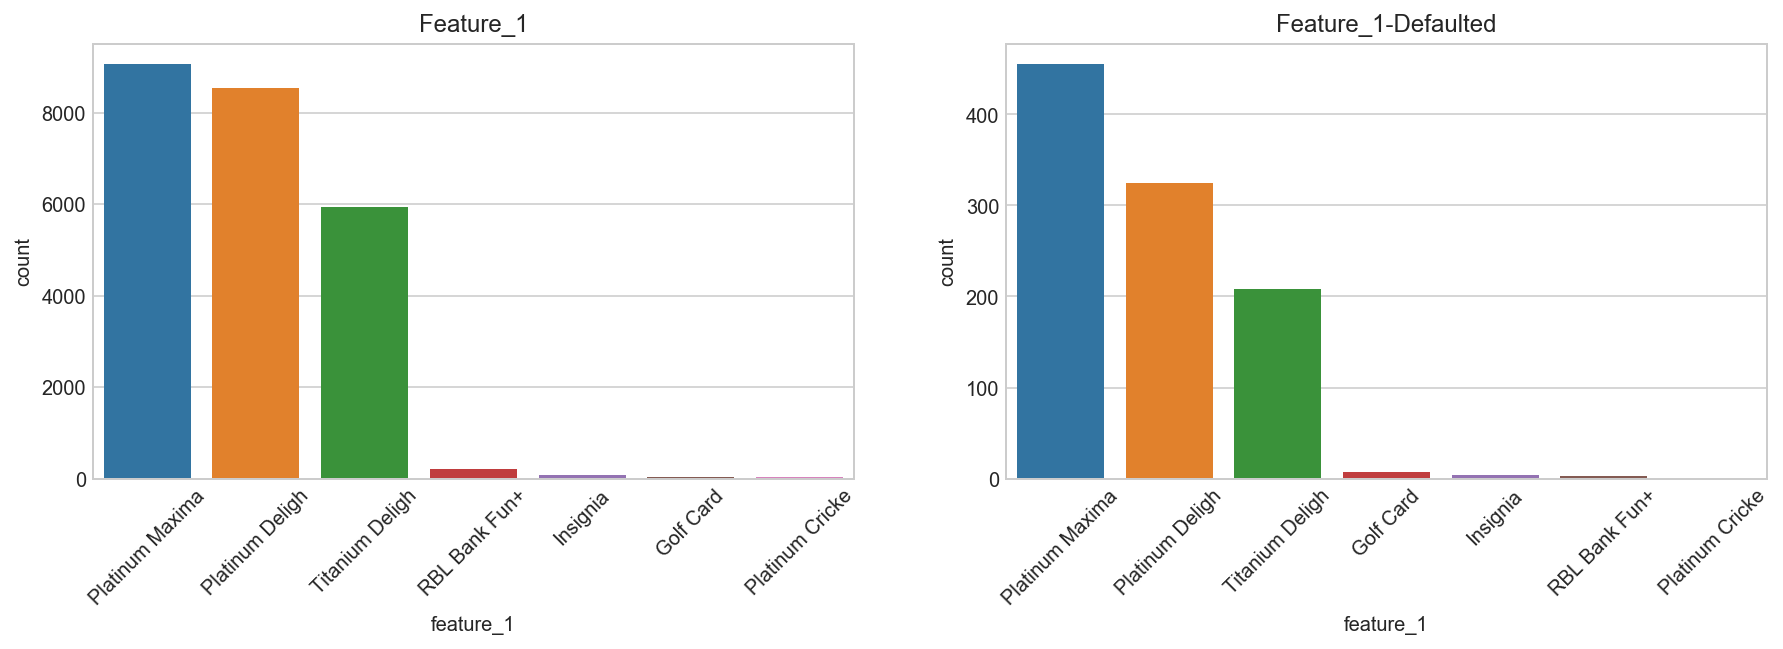

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes
fig.set_size_inches(15,4)

ax1 = sns.countplot(x="feature_1", data = df_data, ax=ax1, order = df_data.feature_1.value_counts().index)
ax1.set_title('Feature_1')
for item in ax1.get_xticklabels():
    item.set_rotation(45)
    
ax2 = sns.countplot(x="feature_1", data = df_data_def, ax=ax2, order = df_data_def.feature_1.value_counts().index)
ax2.set_title('Feature_1-Defaulted')
for item in ax2.get_xticklabels():
    item.set_rotation(45)

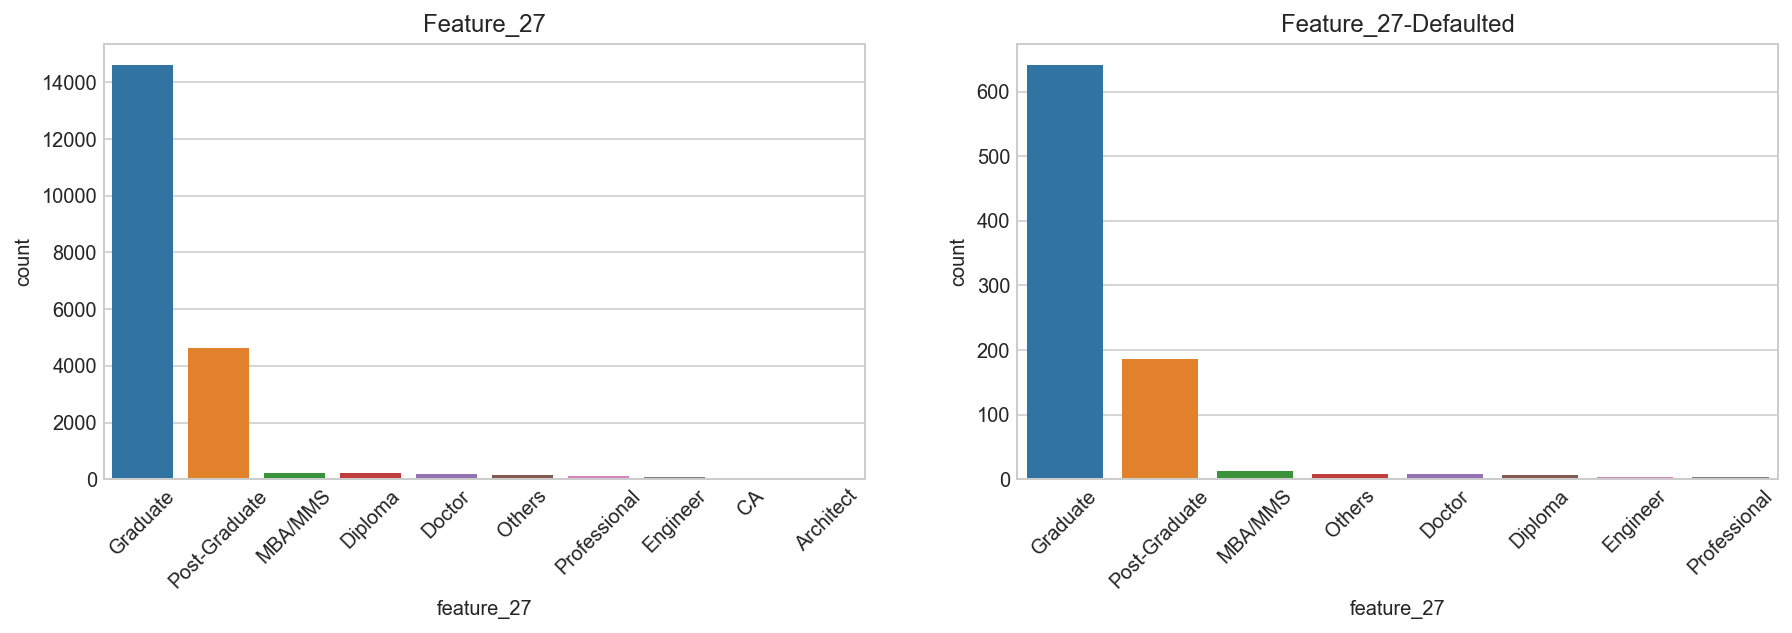

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes
fig.set_size_inches(15,4)

ax1 = sns.countplot(x="feature_27", data = df_data, ax=ax1, order = df_data.feature_27.value_counts().index)
ax1.set_title('Feature_27')
for item in ax1.get_xticklabels():
    item.set_rotation(45)
    
ax2 = sns.countplot(x="feature_27", data = df_data_def, ax=ax2, order = df_data_def.feature_27.value_counts().index)
ax2.set_title('Feature_27-Defaulted')
for item in ax2.get_xticklabels():
    item.set_rotation(45)

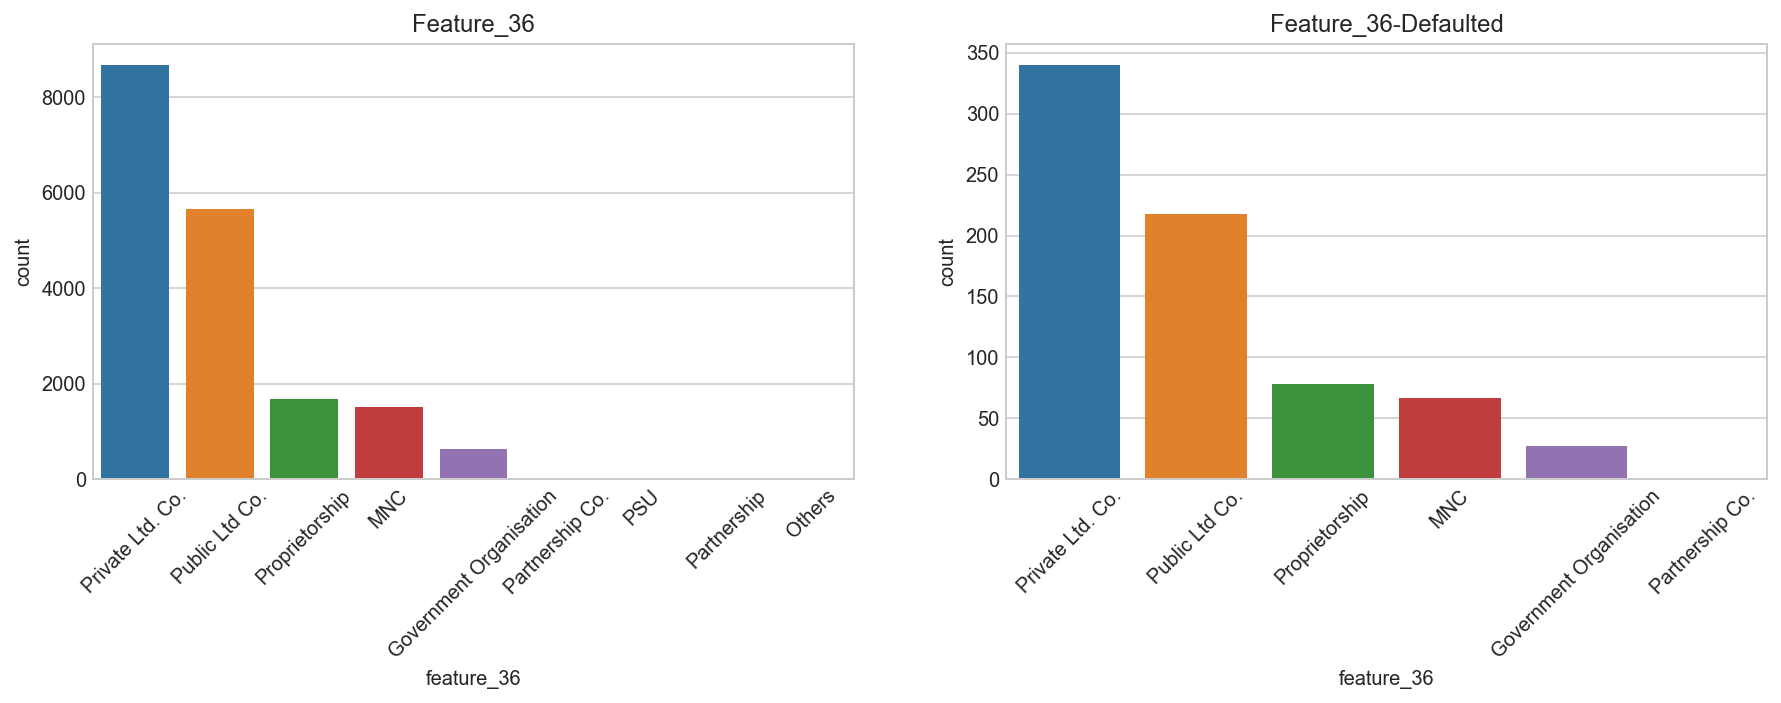

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes
fig.set_size_inches(15,4)

ax1 = sns.countplot(x="feature_36", data = df_data, ax=ax1, order = df_data.feature_36.value_counts().index)
ax1.set_title('Feature_36')
for item in ax1.get_xticklabels():
    item.set_rotation(45)
    
ax2 = sns.countplot(x="feature_36", data = df_data_def, ax=ax2, order = df_data_def.feature_36.value_counts().index)
ax2.set_title('Feature_36-Defaulted')
for item in ax2.get_xticklabels():
    item.set_rotation(45)

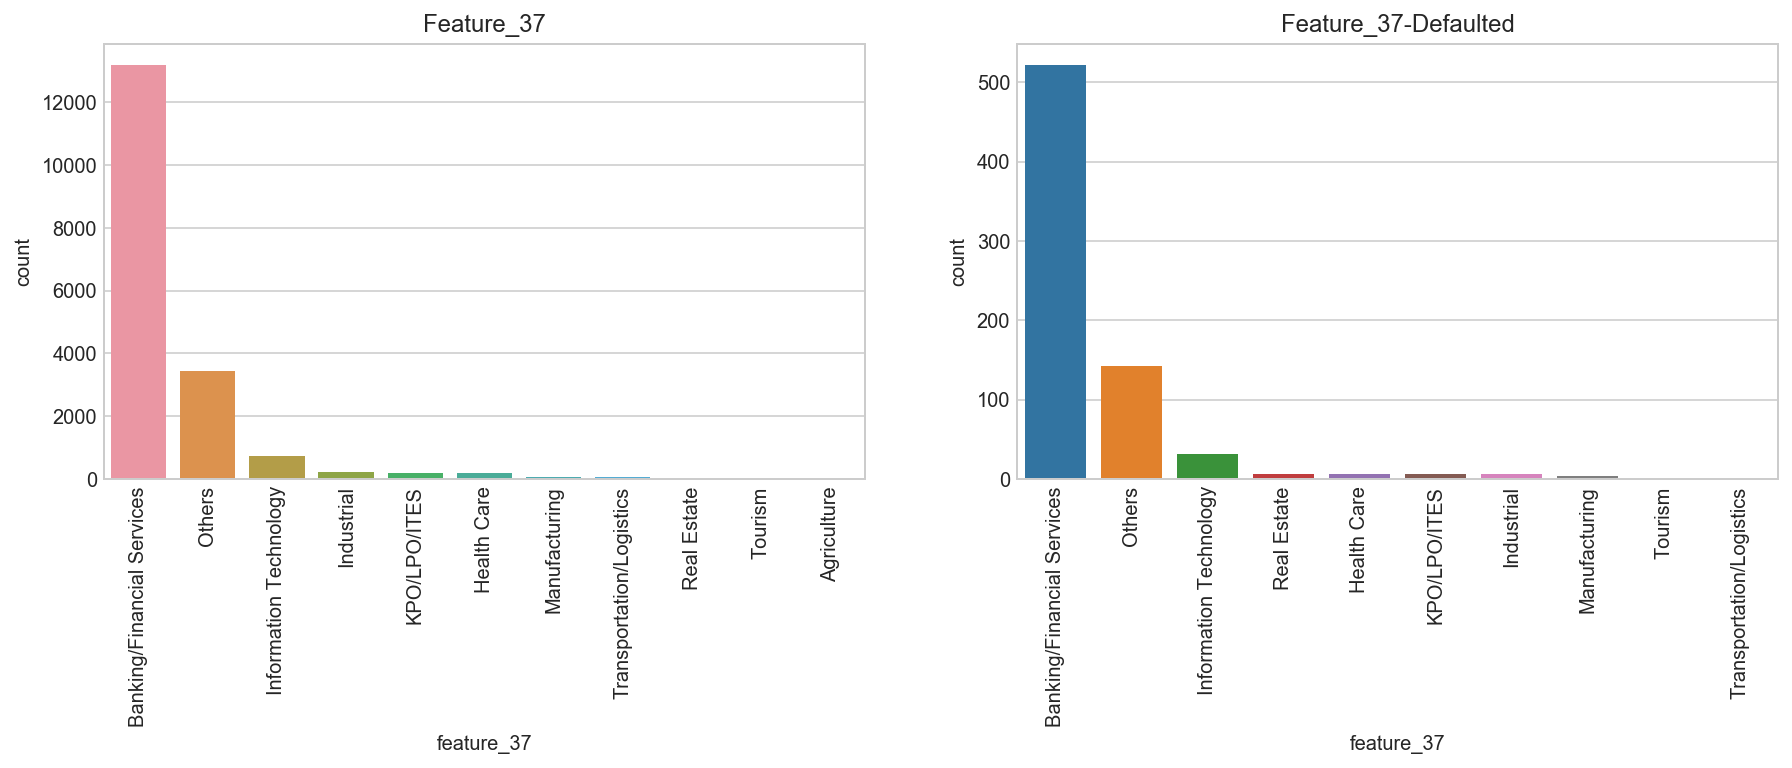

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes
fig.set_size_inches(15,4)

ax1 = sns.countplot(x="feature_37", data = df_data, ax=ax1, order = df_data.feature_37.value_counts().index)
ax1.set_title('Feature_37')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    
ax2 = sns.countplot(x="feature_37", data = df_data_def, ax=ax2, order = df_data_def.feature_37.value_counts().index)
ax2.set_title('Feature_37-Defaulted')
for item in ax2.get_xticklabels():
    item.set_rotation(90)

Due to the nature of sensitivity of the information, most of the demographic information for the customers have been ommited, this makes it a challenge to extract useful features to predict credit default. Especially, since its important to emphasize model interpretability in finance industries before data can be fed into their pipeline.

With reference to credit scoring datasets found commonly in Kaggle competitions, I've made some inferences that demographics such as credit plan, location, educational background, age, type of industry may play a factor in determining whether a customer will default or not. Such relevant categorical columns were preserved to extract any vital information for comparision.

In [53]:
# Remove unnecessary features
unnecessary_feats = ['dt_opened','entry_time','feature_2','feature_4','feature_7','feature_11','feature_12','feature_14',
                     'feature_15','feature_19','feature_16','feature_20','feature_22','feature_23','feature_25','feature_67',
                     'feature_24','feature_26','feature_28','feature_29','feature_30','feature_33','feature_50','feature_59',
                     'feature_34','feature_35','feature_3','feature_39','feature_40','feature_41','feature_44','feature_47',
                     'feature_52','feature_56','feature_63','feature_64','feature_65','feature_66','feature_68','feature_69',
                     'feature_70','feature_71','feature_77','feature_72']

df_data = df_data.drop(unnecessary_feats, axis=1)

I've made an assumption that feature_21 is the date of birth of the customer and proceeded to determine their age as of Dec 2015. 

In [54]:
from datetime import timedelta, date
col = 'feature_21'
df_data[col] = pd.to_datetime(df_data[col])
future = df_data[col] > date(year=2050,month=1,day=1)
df_data.loc[future, col] -= timedelta(days=365.25*100)

# determine age of customer from Dec 2015
df_data['age'] = pd.to_datetime('2015-12-31') - df_data['feature_21']
df_data['age'] = df_data['age'].astype('timedelta64[Y]')
df_data['age'] = df_data['age'].fillna(df_data['age'].median())

In [55]:
df_data.age.describe()

count    23896.000000
mean        33.817626
std          7.379888
min        -33.000000
25%         29.000000
50%         32.000000
75%         37.000000
max         65.000000
Name: age, dtype: float64

Turns out that there is some values with negative age, this is due to an issue 

In [56]:
# imputations done below
df_data.loc[df_data['customer_no'] == 58, 'age'] = 37
df_data.loc[df_data['customer_no'] == 5163, 'age'] = 24
df_data.loc[df_data['customer_no'] == 11112, 'age'] = 69
df_data.loc[df_data['customer_no'] == 12492, 'age'] = 76

In [57]:
df_data.age.describe()

count    23896.000000
mean        33.831311
std          7.341926
min         18.000000
25%         29.000000
50%         32.000000
75%         37.000000
max         76.000000
Name: age, dtype: float64

In [58]:
df_data.Bad_label = raw_data_70.Bad_label
df_data_def = df_data[df_data.Bad_label == 1]

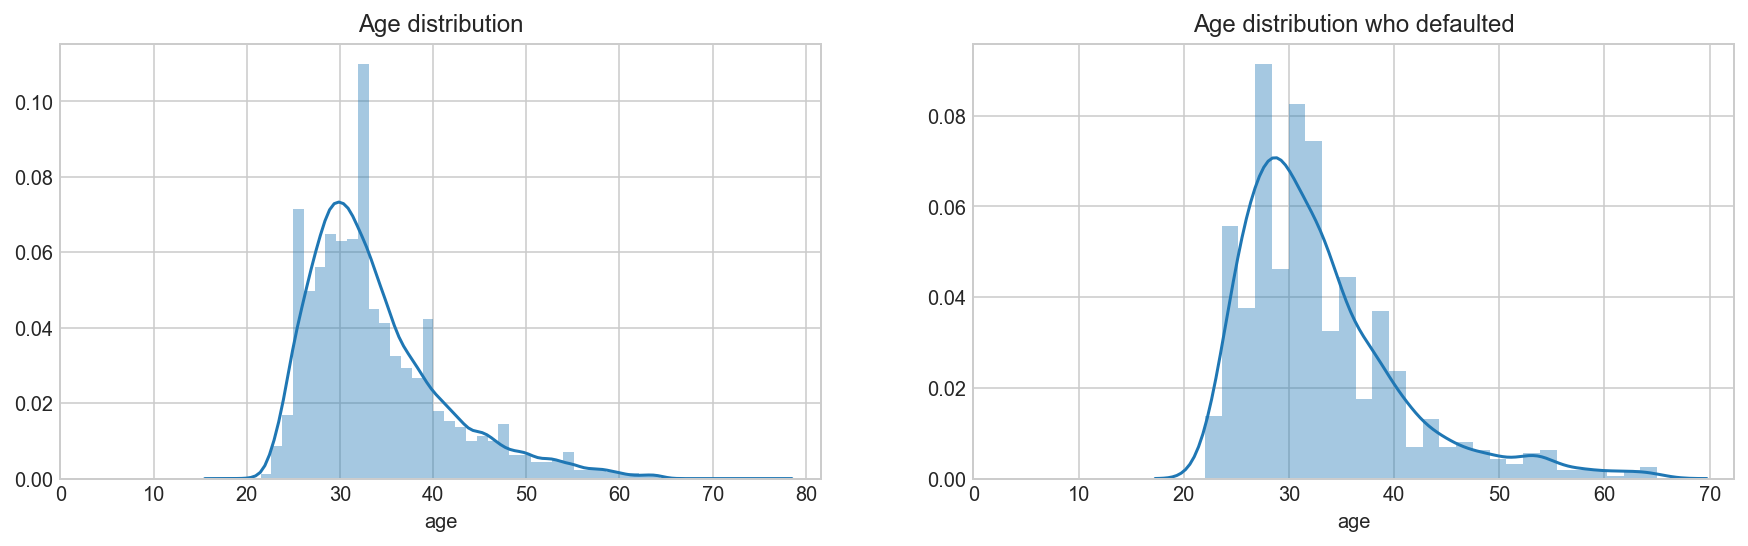

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1, ax2 = axes
fig.set_size_inches(15,4)

ax1 = sns.distplot(df_data.age, ax=ax1)
ax1.set_title('Age distribution')
ax1.set_xlim(0,)

ax2 = sns.distplot(df_data_def.age, ax=ax2)
ax2.set_title('Age distribution who defaulted')
ax2.set_xlim(0,);

Label encoding categorical features in the dataset.

In [60]:
df_data = df_data.fillna(0)

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
def encode_with_LabelEncoder(df, column_name):
    label_encoder = LabelEncoder()
    label_encoder.fit(df[column_name])
    df[column_name+'_le'] = label_encoder.transform(df[column_name])
    df.drop([column_name], axis=1, inplace=True)
    return label_encoder

In [63]:
# label encoding categorical features    
encode_with_LabelEncoder(df_data,'feature_43')
encode_with_LabelEncoder(df_data,'feature_38')

df_data = pd.get_dummies(data=df_data, columns=['feature_1','feature_27','feature_32','feature_36','feature_37'])

In [64]:
df_data = df_data.drop(['feature_21','feature_1_0','feature_27_0','feature_27_Architect',
                        'feature_32_0','feature_36_0','feature_37_0'],axis=1)

In [65]:
df_data['Bad_label'] = raw_data_70.Bad_label

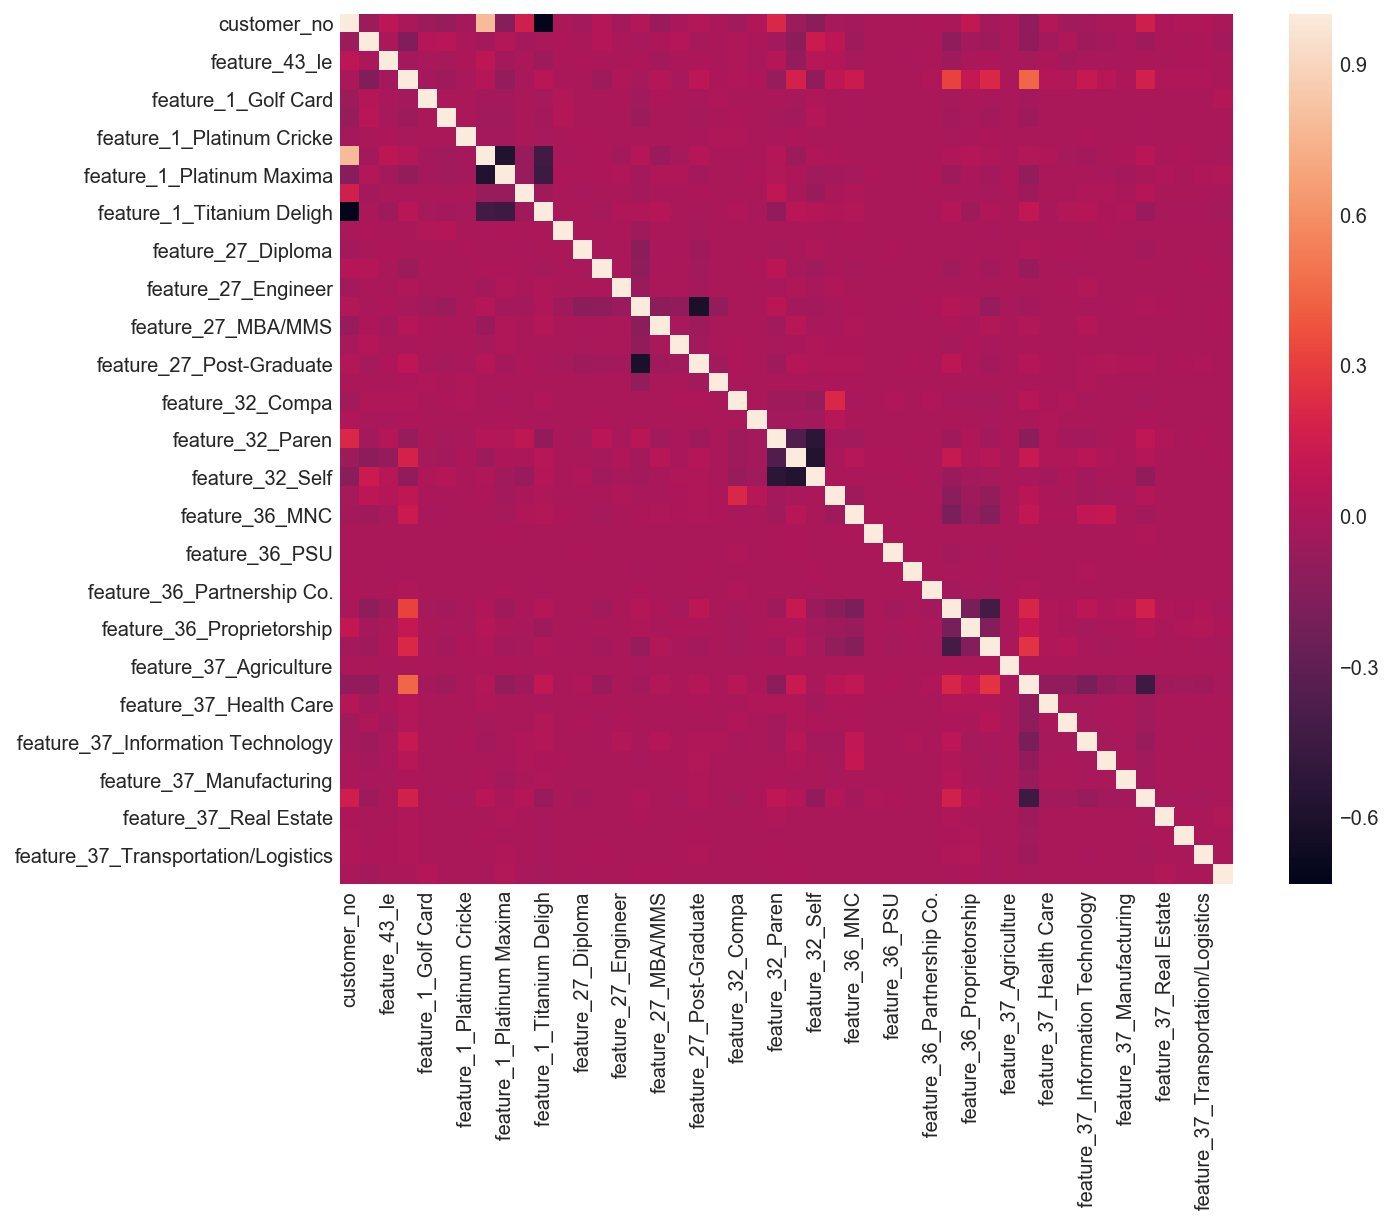

In [66]:
col = df_data[list(df_data.columns)]
to_heatmap = col.corr(method='spearman', min_periods=1)

fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
sns.heatmap(to_heatmap)

In [67]:
df_data.shape

(23896, 46)

In [68]:
# Prepare data for merging
df_data = df_data.drop(['customer_no','Bad_label'],axis=1)

## Final Data Model - for training 

In [69]:
# Import customer_no
a0 = raw_data_70.customer_no
d0 = raw_data_70.Bad_label
# Generate feature engineered data model for modeling
data_model = pd.concat([a0,a1,a2,a3,a4m,a5m,a6,a7,b1,b2,b3,b4,b5,df_data,d0],axis=1)
data_model[[0,1,2]] = data_model[[0,1,2]].shift(-1) 
data_model = data_model.rename(index=str, columns={0:"no_enq_365", 1:"no_enq_90", 2:"ratio_sec/tot_enq"})
# Remember to drop last row
data_model = data_model.drop(data_model.index[23896])
data_model

,customer_no,dpd_29,total_lastpy_opendt,min_months_last_30_plus,total cur_bal_amt/total credit limit,utilisation_trend,mean_lastpy_opendt,mean_paymt_his,no_enq_365,no_enq_90,max_freq_enq,ratio_sec/tot_enq,days_pass_enq_dt,age,feature_43_le,feature_38_le,feature_1_Golf Card,feature_1_Insignia,feature_1_Platinum Cricke,feature_1_Platinum Deligh,feature_1_Platinum Maxima,feature_1_RBL Bank Fun+,feature_1_Titanium Deligh,feature_27_CA,feature_27_Diploma,feature_27_Doctor,feature_27_Engineer,feature_27_Graduate,feature_27_MBA/MMS,feature_27_Others,feature_27_Post-Graduate,feature_27_Professional,feature_32_Compa,feature_32_PG/Ho,feature_32_Paren,feature_32_Rente,feature_32_Self,feature_36_Government Organisation,feature_36_MNC,feature_36_Others,feature_36_PSU,feature_36_Partnership,feature_36_Partnership Co.,feature_36_Private Ltd. Co.,feature_36_Proprietorship,feature_36_Public Ltd Co.,feature_37_Agriculture,feature_37_Banking/Financial Services,feature_37_Health Care,feature_37_Industrial,feature_37_Information Technology,feature_37_KPO/LPO/ITES,feature_37_Manufacturing,feature_37_Others,feature_37_Real Estate,feature_37_Tourism,feature_37_Transportation/Logistics,Bad_label
0,1.0,0.444444,14960.0,0.0,7.037100,0.000107,1496.000000,10.388889,1.0,NaN,10.0,0.055556,1443.500000,50.0,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.000000,4070.0,0.0,0.030754,2.000000,2035.000000,12.625000,19.0,2.0,51.0,0.544118,812.485294,53.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.000000,2454.0,0.0,0.000000,0.000000,2454.000000,12.625000,NaN,NaN,1.0,1.000000,438.000000,49.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.705882,38600.0,3.0,1.930512,0.000047,2757.142857,13.588235,NaN,NaN,51.0,0.529412,1920.823529,51.0,52.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.857143,1357.0,0.0,0.000000,0.000000,678.500000,13.714286,NaN,NaN,10.0,NaN,1497.500000,61.0,29.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,0.805556,41021.0,2.0,10.953087,0.000067,1640.840000,10.833333,3.0,NaN,2.0,0.481481,1725.370370,52.0,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7.0,0.857143,15521.0,0.0,0.226345,0.000060,2586.833333,15.285714,NaN,NaN,10.0,NaN,3258.000000,61.0,48.0,233.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,8.0,0.800000,26025.0,0.0,24.483558,0.000060,3253.125000,11.066667,6.0,NaN,1.0,0.588235,1158.588235,64.0,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9.0,1.000000,12636.0,0.0,22.858634,0.000059,2527.200000,12.833333,6.0,NaN,1.0,0.631579,891.473684,38.0,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,0.833333,21912.0,7.0,0.611652,0.000049,1992.000000,14.750000,7.0,1.0,1.0,0.428571,897.571429,46.0,44.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [70]:
data_model = data_model.to_csv('data_model_train.csv')

The following data was similarly fed onto the testing dataset to be featured transformed